In [1]:
import pickle

import mouse
import keyboard
from datetime import datetime, timedelta

In [2]:
with open("test_mouse_events.pkl", "rb") as f:
    mouse_events = pickle.load(f)
    
with open("test_window_positions.pkl", "rb") as f:
    window_positions = pickle.load(f)

In [3]:
x = []
y = []
durations = []
for n, event in enumerate(mouse_events[1:]):
    if isinstance(event, mouse._mouse_event.MoveEvent):
        
        previous_event = mouse_events[n]
        start_time = datetime.fromtimestamp(previous_event.time)
        end_time = datetime.fromtimestamp(event.time)
        time_delta = end_time - start_time
        if time_delta == timedelta(0):
            continue
        try:
            pos = (previous_event.x, previous_event.y)
            x.append(previous_event.x)
            y.append(previous_event.y)
            durations.append(time_delta)
        except:
            print(n, event)
        #print(time_delta, pos)

46 MoveEvent(x=532, y=296, time=1634670604.765104)
115 MoveEvent(x=452, y=566, time=1634670606.8378081)
199 MoveEvent(x=228, y=344, time=1634670608.1869001)
302 MoveEvent(x=263, y=564, time=1634670610.0146332)
383 MoveEvent(x=226, y=453, time=1634670611.7071629)
435 MoveEvent(x=467, y=320, time=1634670612.52074)
514 MoveEvent(x=936, y=698, time=1634670615.2785466)
565 MoveEvent(x=1362, y=187, time=1634670616.210597)
1686 MoveEvent(x=1884, y=24, time=1634670633.2269738)


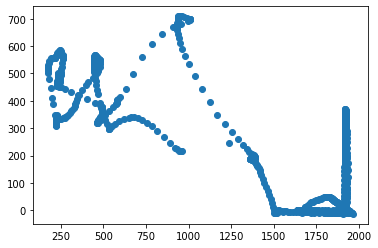

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [5]:
x=[0, *x]
y=[0, *y]
x=[1920,*x]
y=[1080,*y]

C:\Users\malte\anaconda3\envs\evaluate_gui_study\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Assuming a fixed window position.


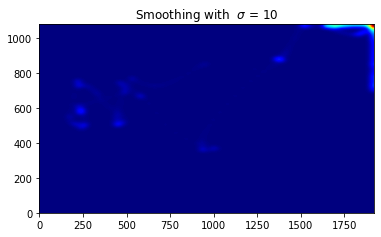

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import warnings


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig = plt.figure()

# Generate some test data
#x = np.random.randn(1000)
#y = np.random.randn(1000)

sigmas = [10]

#for ax, sigma in zip(axs.flatten(), sigmas):
img, extent = myplot(x, y, sigmas[0])
fig.gca().imshow(img, extent=extent, cmap=cm.jet)
fig.gca().set_title("Smoothing with  $\sigma$ = %d" % sigmas[0])

warnings.warn("Assuming a fixed window position.")
min_x = window_positions.iloc[0]['pos_x']
min_y = window_positions.iloc[0]['pos_y']
width = window_positions.iloc[0]['width']
height = window_positions.iloc[0]['height']
#plt.xlim(min_x, min_x+width)
#plt.ylim(min_y, min_y+height)
plt.xlim(0, 1920)
plt.ylim(0, 1080)
plt.show()